## Data Science Minor October

## Predicting Wine Quality

For this project, I used  Red Wine Quality dataset to build various classification models to predict whether a particular red wine is “good quality” or not. Each wine in this dataset is given a “quality” score between 0 and 10. For the purpose of this project, I converted the output to a binary output where each wine is either “good quality” (a score of 6 or higher) or not (a score below 6). The quality of a wine is determined by 11 input variables:
Fixed acidity,
Volatile acidity,
Citric acid,
Residual sugar,
Chlorides,
Free sulfur dioxide,
Total sulfur dioxide,
Density,
pH,
Sulfates,
Alcohol.

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import plotly.express as px



### Reading Data

In [3]:
bd = pd.read_csv('winequality-red.csv',delimiter=';')

### Understanding Data

Basic commands

In [4]:
bd.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [76]:
print("Rows, columns: " + str(bd.shape))

Rows, columns: (1599, 13)


Missing Values

In [5]:
print(bd.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [6]:
bd.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
bd.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [8]:
bd.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [9]:
bd.density.unique()

array([0.9978 , 0.9968 , 0.997  , 0.998  , 0.9964 , 0.9946 , 0.9959 ,
       0.9943 , 0.9974 , 0.9986 , 0.9969 , 0.9982 , 0.9966 , 0.9955 ,
       0.9962 , 0.9972 , 0.9958 , 0.9993 , 0.9957 , 0.9975 , 0.994  ,
       0.9976 , 0.9934 , 0.9954 , 0.9971 , 0.9956 , 0.9983 , 0.9967 ,
       0.9961 , 0.9984 , 0.9938 , 0.9932 , 0.9965 , 0.9963 , 0.996  ,
       0.9973 , 0.9988 , 0.9937 , 0.9952 , 0.9916 , 0.9944 , 0.9996 ,
       0.995  , 0.9981 , 0.9953 , 0.9924 , 0.9948 , 0.99695, 0.99545,
       0.99615, 0.9994 , 0.99625, 0.99585, 0.99685, 0.99655, 0.99525,
       0.99815, 0.99745, 0.9927 , 0.99675, 0.99925, 0.99565, 1.00005,
       0.9985 , 0.99965, 0.99575, 0.9999 , 1.00025, 0.9987 , 0.99935,
       0.99735, 0.99915, 0.9991 , 1.00015, 0.9997 , 1.001  , 0.9979 ,
       1.0014 , 1.0001 , 0.99855, 0.99845, 0.9998 , 0.99645, 0.99865,
       0.9989 , 0.99975, 0.999  , 1.0015 , 1.0002 , 0.9992 , 1.0008 ,
       1.     , 1.0006 , 1.0004 , 1.0018 , 0.9912 , 1.0022 , 1.0003 ,
       0.9949 , 0.99

In [10]:
bd.alcohol.unique()

array([ 9.4       ,  9.8       , 10.        ,  9.5       , 10.5       ,
        9.2       ,  9.9       ,  9.1       ,  9.3       ,  9.        ,
        9.7       , 10.1       , 10.6       ,  9.6       , 10.8       ,
       10.3       , 13.1       , 10.2       , 10.9       , 10.7       ,
       12.9       , 10.4       , 13.        , 14.        , 11.5       ,
       11.4       , 12.4       , 11.        , 12.2       , 12.8       ,
       12.6       , 12.5       , 11.7       , 11.3       , 12.3       ,
       12.        , 11.9       , 11.8       ,  8.7       , 13.3       ,
       11.2       , 11.6       , 11.1       , 13.4       , 12.1       ,
        8.4       , 12.7       , 14.9       , 13.2       , 13.6       ,
       13.5       , 10.03333333,  9.55      ,  8.5       , 11.06666667,
        9.56666667, 10.55      ,  8.8       , 13.56666667, 11.95      ,
        9.95      ,  9.23333333,  9.25      ,  9.05      , 10.75      ])

In [11]:
bd.pH.unique()

array([3.51, 3.2 , 3.26, 3.16, 3.3 , 3.39, 3.36, 3.35, 3.28, 3.58, 3.17,
       3.11, 3.38, 3.04, 3.52, 3.43, 3.34, 3.47, 3.46, 3.45, 3.4 , 3.42,
       3.23, 3.5 , 3.33, 3.21, 3.48, 3.9 , 3.25, 3.32, 3.15, 3.41, 3.44,
       3.31, 3.54, 3.13, 2.93, 3.14, 3.75, 3.85, 3.29, 3.08, 3.37, 3.19,
       3.07, 3.49, 3.53, 3.24, 3.63, 3.22, 3.68, 2.74, 3.59, 3.  , 3.12,
       3.57, 3.61, 3.06, 3.6 , 3.69, 3.1 , 3.05, 3.67, 3.27, 3.18, 3.02,
       3.55, 2.99, 3.01, 3.56, 3.03, 3.62, 2.88, 2.95, 2.98, 3.09, 2.86,
       3.74, 2.92, 3.72, 2.87, 2.89, 2.94, 3.66, 3.71, 3.78, 3.7 , 4.01,
       2.9 ])

In [12]:
bd.pH.nunique()

89

In [13]:
bd.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [14]:
bd.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### Exploring Variables

 Visual summary

In [15]:
import seaborn as sns
%matplotlib inline

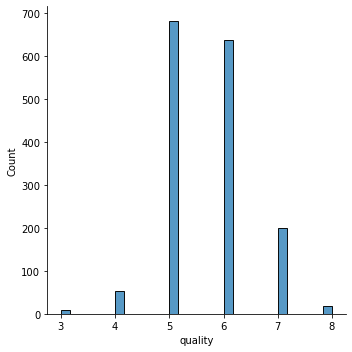

In [16]:
sns.displot(bd['quality'])

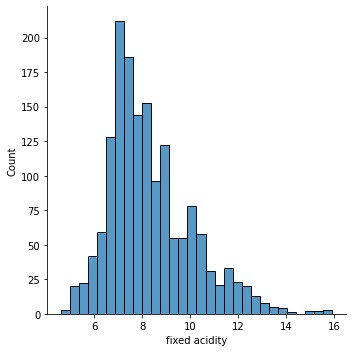

In [17]:
sns.displot(bd['fixed acidity'],kde=False,bins=30)

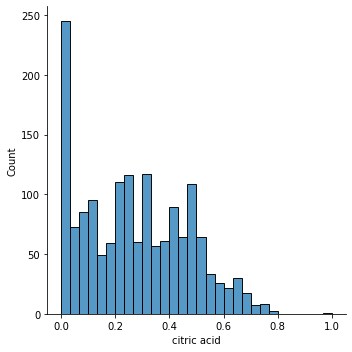

In [18]:
sns.displot(bd['citric acid'],kde=False,bins=30)

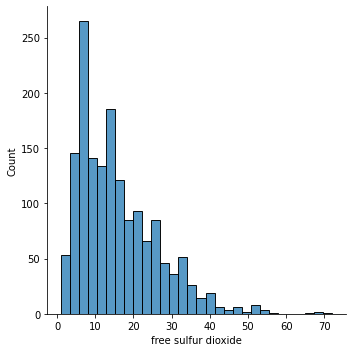

In [19]:
sns.displot(bd['free sulfur dioxide'],kde=False,bins=30)

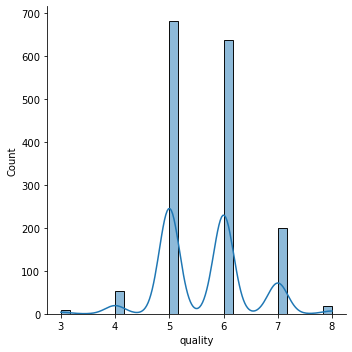

In [20]:
sns.displot(bd['quality'],kde=True,bins=30)

In [21]:
#min and max range
bd['quality'].min(),bd['quality'].max()

(3, 8)

<AxesSubplot:xlabel='quality', ylabel='Density'>

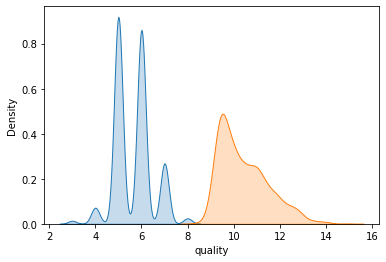

In [22]:
sns.kdeplot(bd['quality'],shade=True)
sns.kdeplot(bd['alcohol'],shade=True)

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality'>

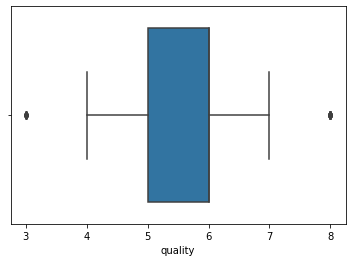

In [23]:
sns.boxplot(bd['quality'])

<AxesSubplot:ylabel='quality'>

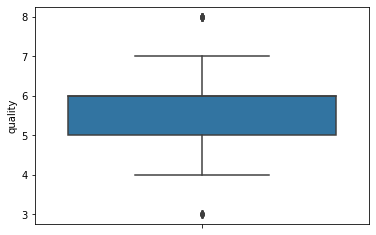

In [24]:
sns.boxplot(y='quality',data=bd)

# Symmetric and non-symmetric 

<AxesSubplot:ylabel='quality'>

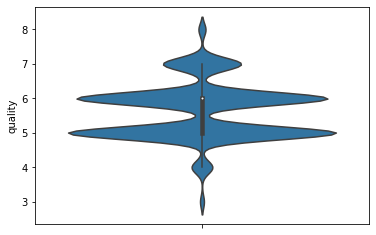

In [25]:
sns.violinplot(y='quality',data=bd)

# numeric-numeric

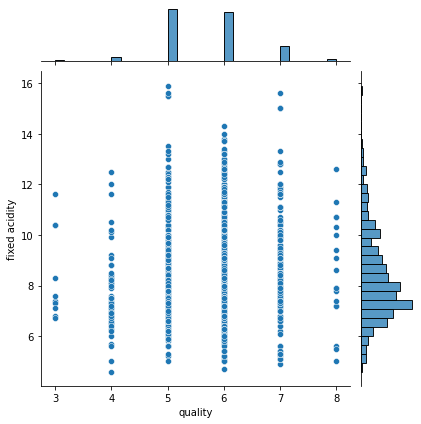

In [26]:
sns.jointplot(x='quality',y='fixed acidity',data=bd)

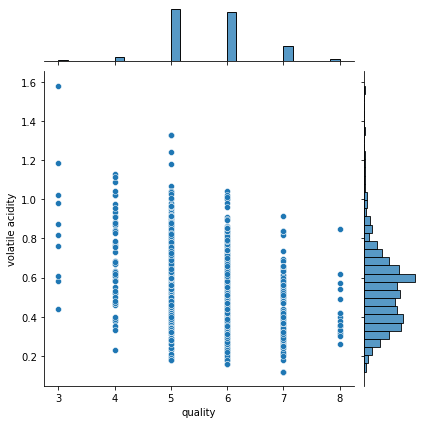

In [27]:
sns.jointplot(x='quality',y='volatile acidity',data=bd)

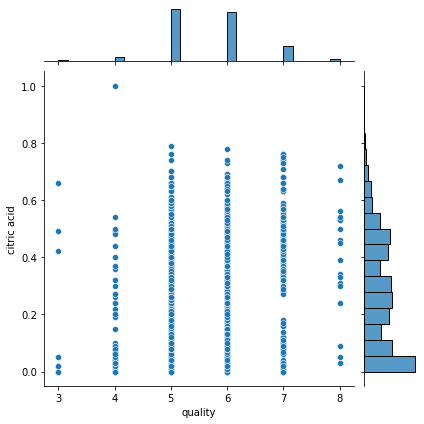

In [28]:
sns.jointplot(x='quality',y='citric acid',data=bd)

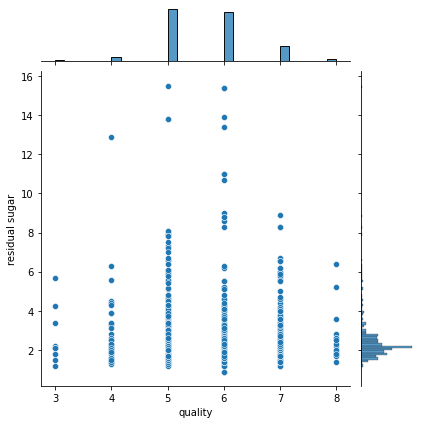

In [29]:
sns.jointplot(x='quality',y='residual sugar',data=bd)

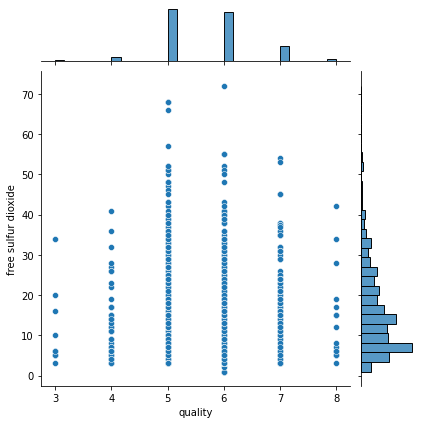

In [30]:
sns.jointplot(x='quality',y='free sulfur dioxide',data=bd)

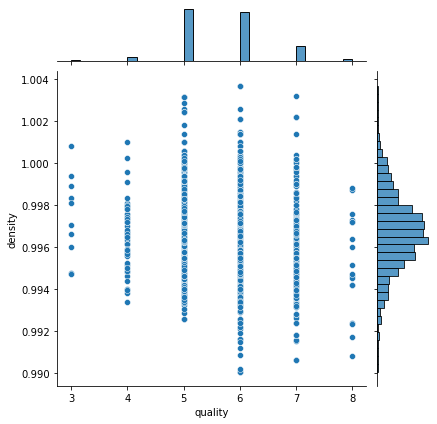

In [31]:
sns.jointplot(x='quality',y='density',data=bd)

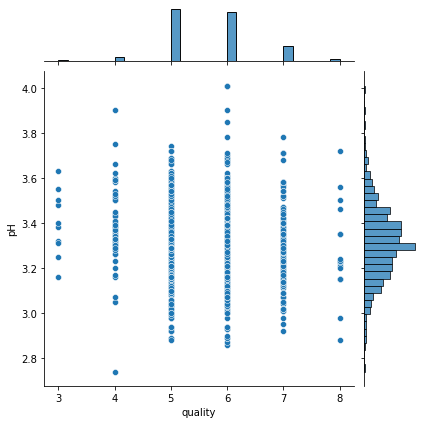

In [32]:
sns.jointplot(x='quality',y='pH',data=bd)

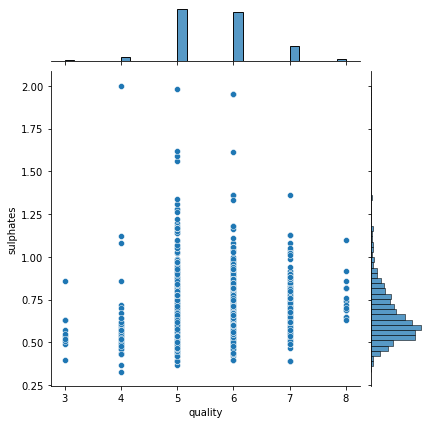

In [33]:
sns.jointplot(x='quality',y='sulphates',data=bd)

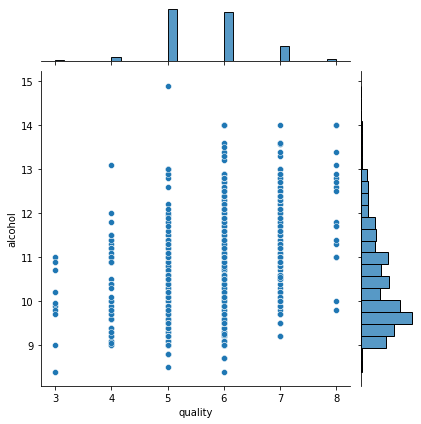

In [34]:
sns.jointplot(x='quality',y='alcohol',data=bd)

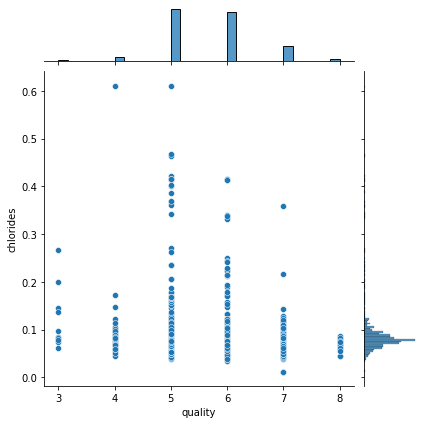

In [35]:
sns.jointplot(x='quality',y='chlorides',data=bd)

C:\Users\acer\anaconda3\lib\site-packages\seaborn\axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


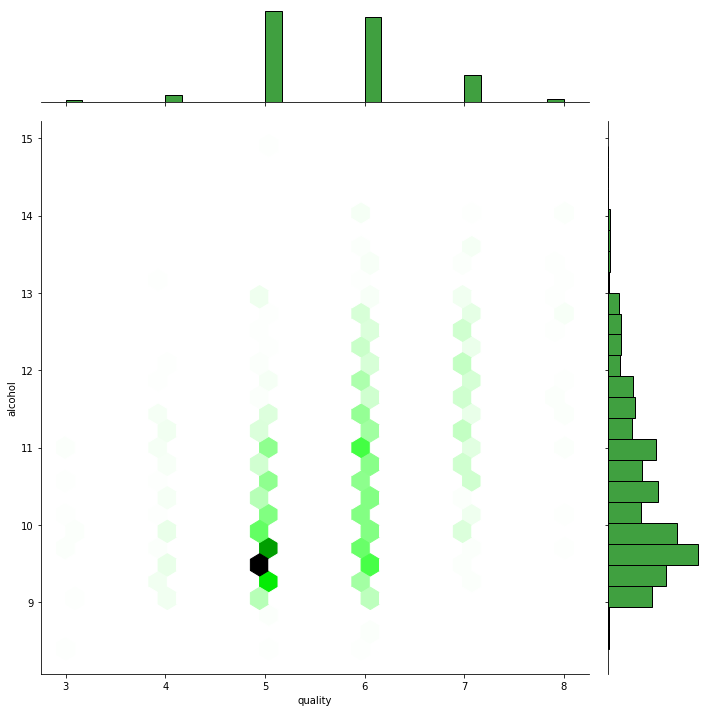

In [36]:
sns.jointplot(x="quality",y="alcohol", data=bd.loc[(bd['alcohol']>0)&(bd['alcohol']<100),:],kind="hex",size=10,color="g")

C:\Users\acer\anaconda3\lib\site-packages\seaborn\axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


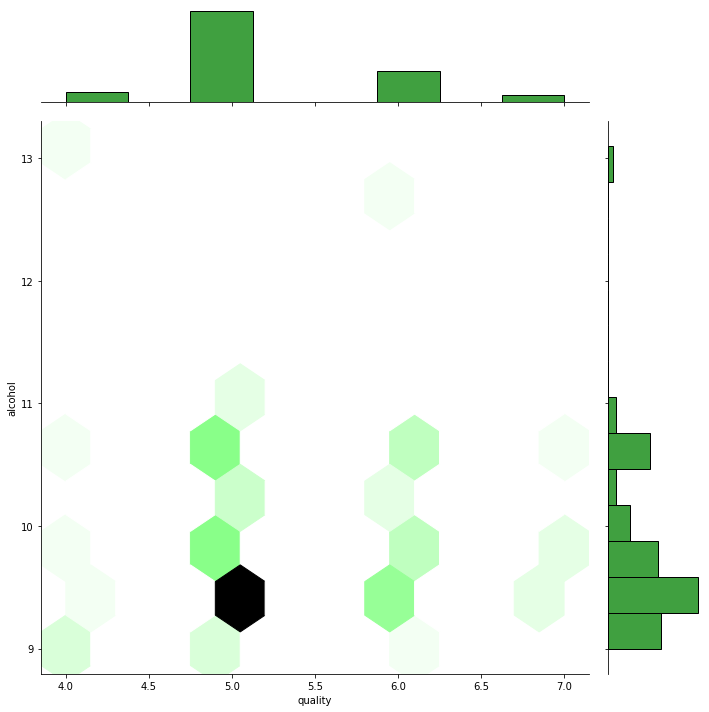

In [37]:
sns.jointplot(x="quality", y="alcohol", data=bd.iloc[:100,:],kind="hex" , size=10,color="g")

In [38]:
bd.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


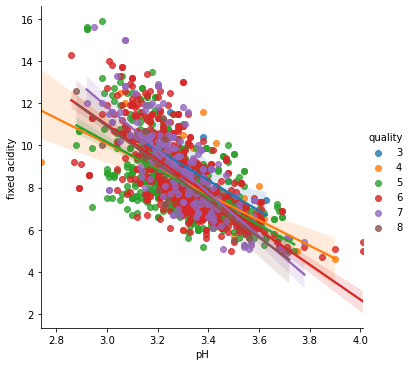

In [39]:
sns.lmplot('pH','fixed acidity', data=bd ,hue='quality')

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


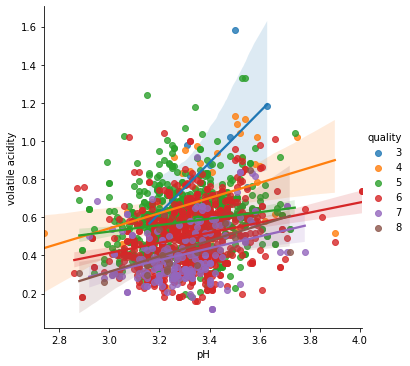

In [40]:
sns.lmplot('pH','volatile acidity', data=bd ,hue='quality')

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


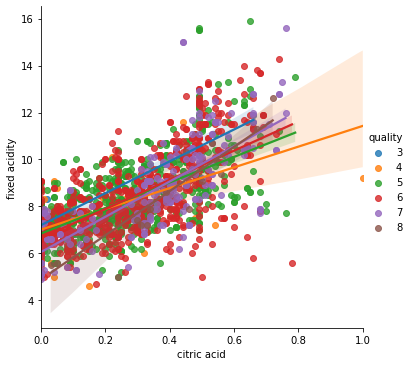

In [41]:
sns.lmplot('citric acid','fixed acidity', data=bd ,hue='quality')

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


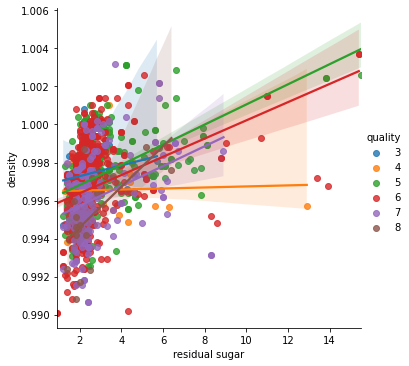

In [42]:
sns.lmplot('residual sugar','density', data=bd ,hue='quality')

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


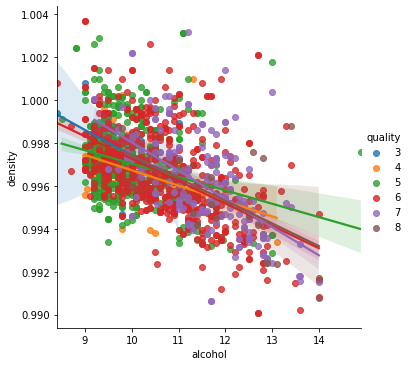

In [43]:
sns.lmplot('alcohol','density', data=bd ,hue='quality')

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


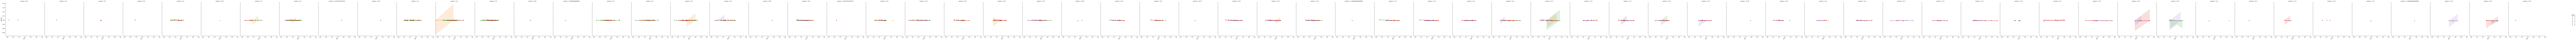

In [44]:
sns.lmplot('pH','density', data=bd ,hue='quality',col='alcohol')

categorical

<AxesSubplot:>

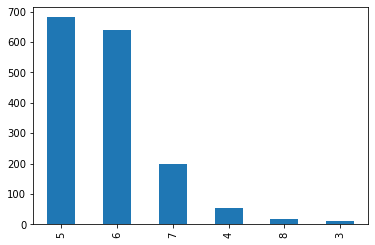

In [45]:
bd.quality.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='alcohol', ylabel='count'>

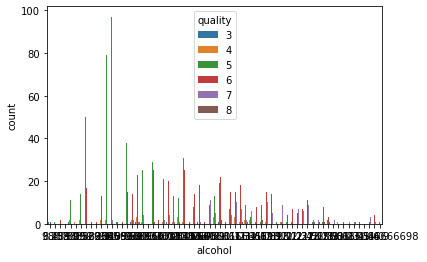

In [46]:
sns.countplot(x="alcohol", data=bd, hue='quality')

<AxesSubplot:xlabel='pH', ylabel='count'>

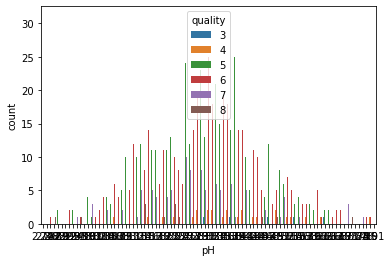

In [47]:
sns.countplot(x="pH", data=bd, hue='quality')

<AxesSubplot:xlabel='density', ylabel='count'>

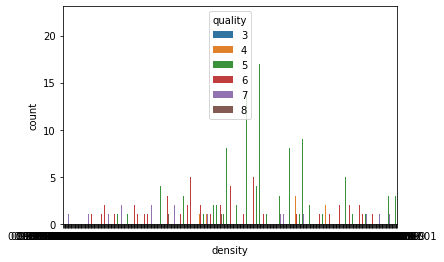

In [48]:
sns.countplot(x="density", data=bd, hue='quality')

<AxesSubplot:xlabel='fixed acidity', ylabel='count'>

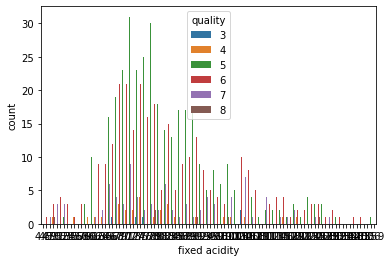

In [49]:
sns.countplot(x="fixed acidity", data=bd, hue='quality')

Numeric Categorical

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

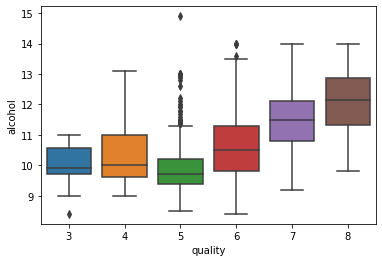

In [50]:
sns.boxplot(x='quality',y='alcohol',data=bd)

 HeatMaps

In [51]:
bd.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

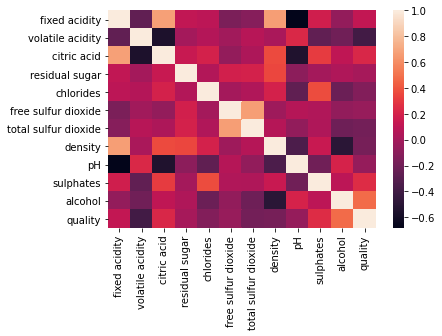

In [52]:
sns.heatmap(bd.corr())

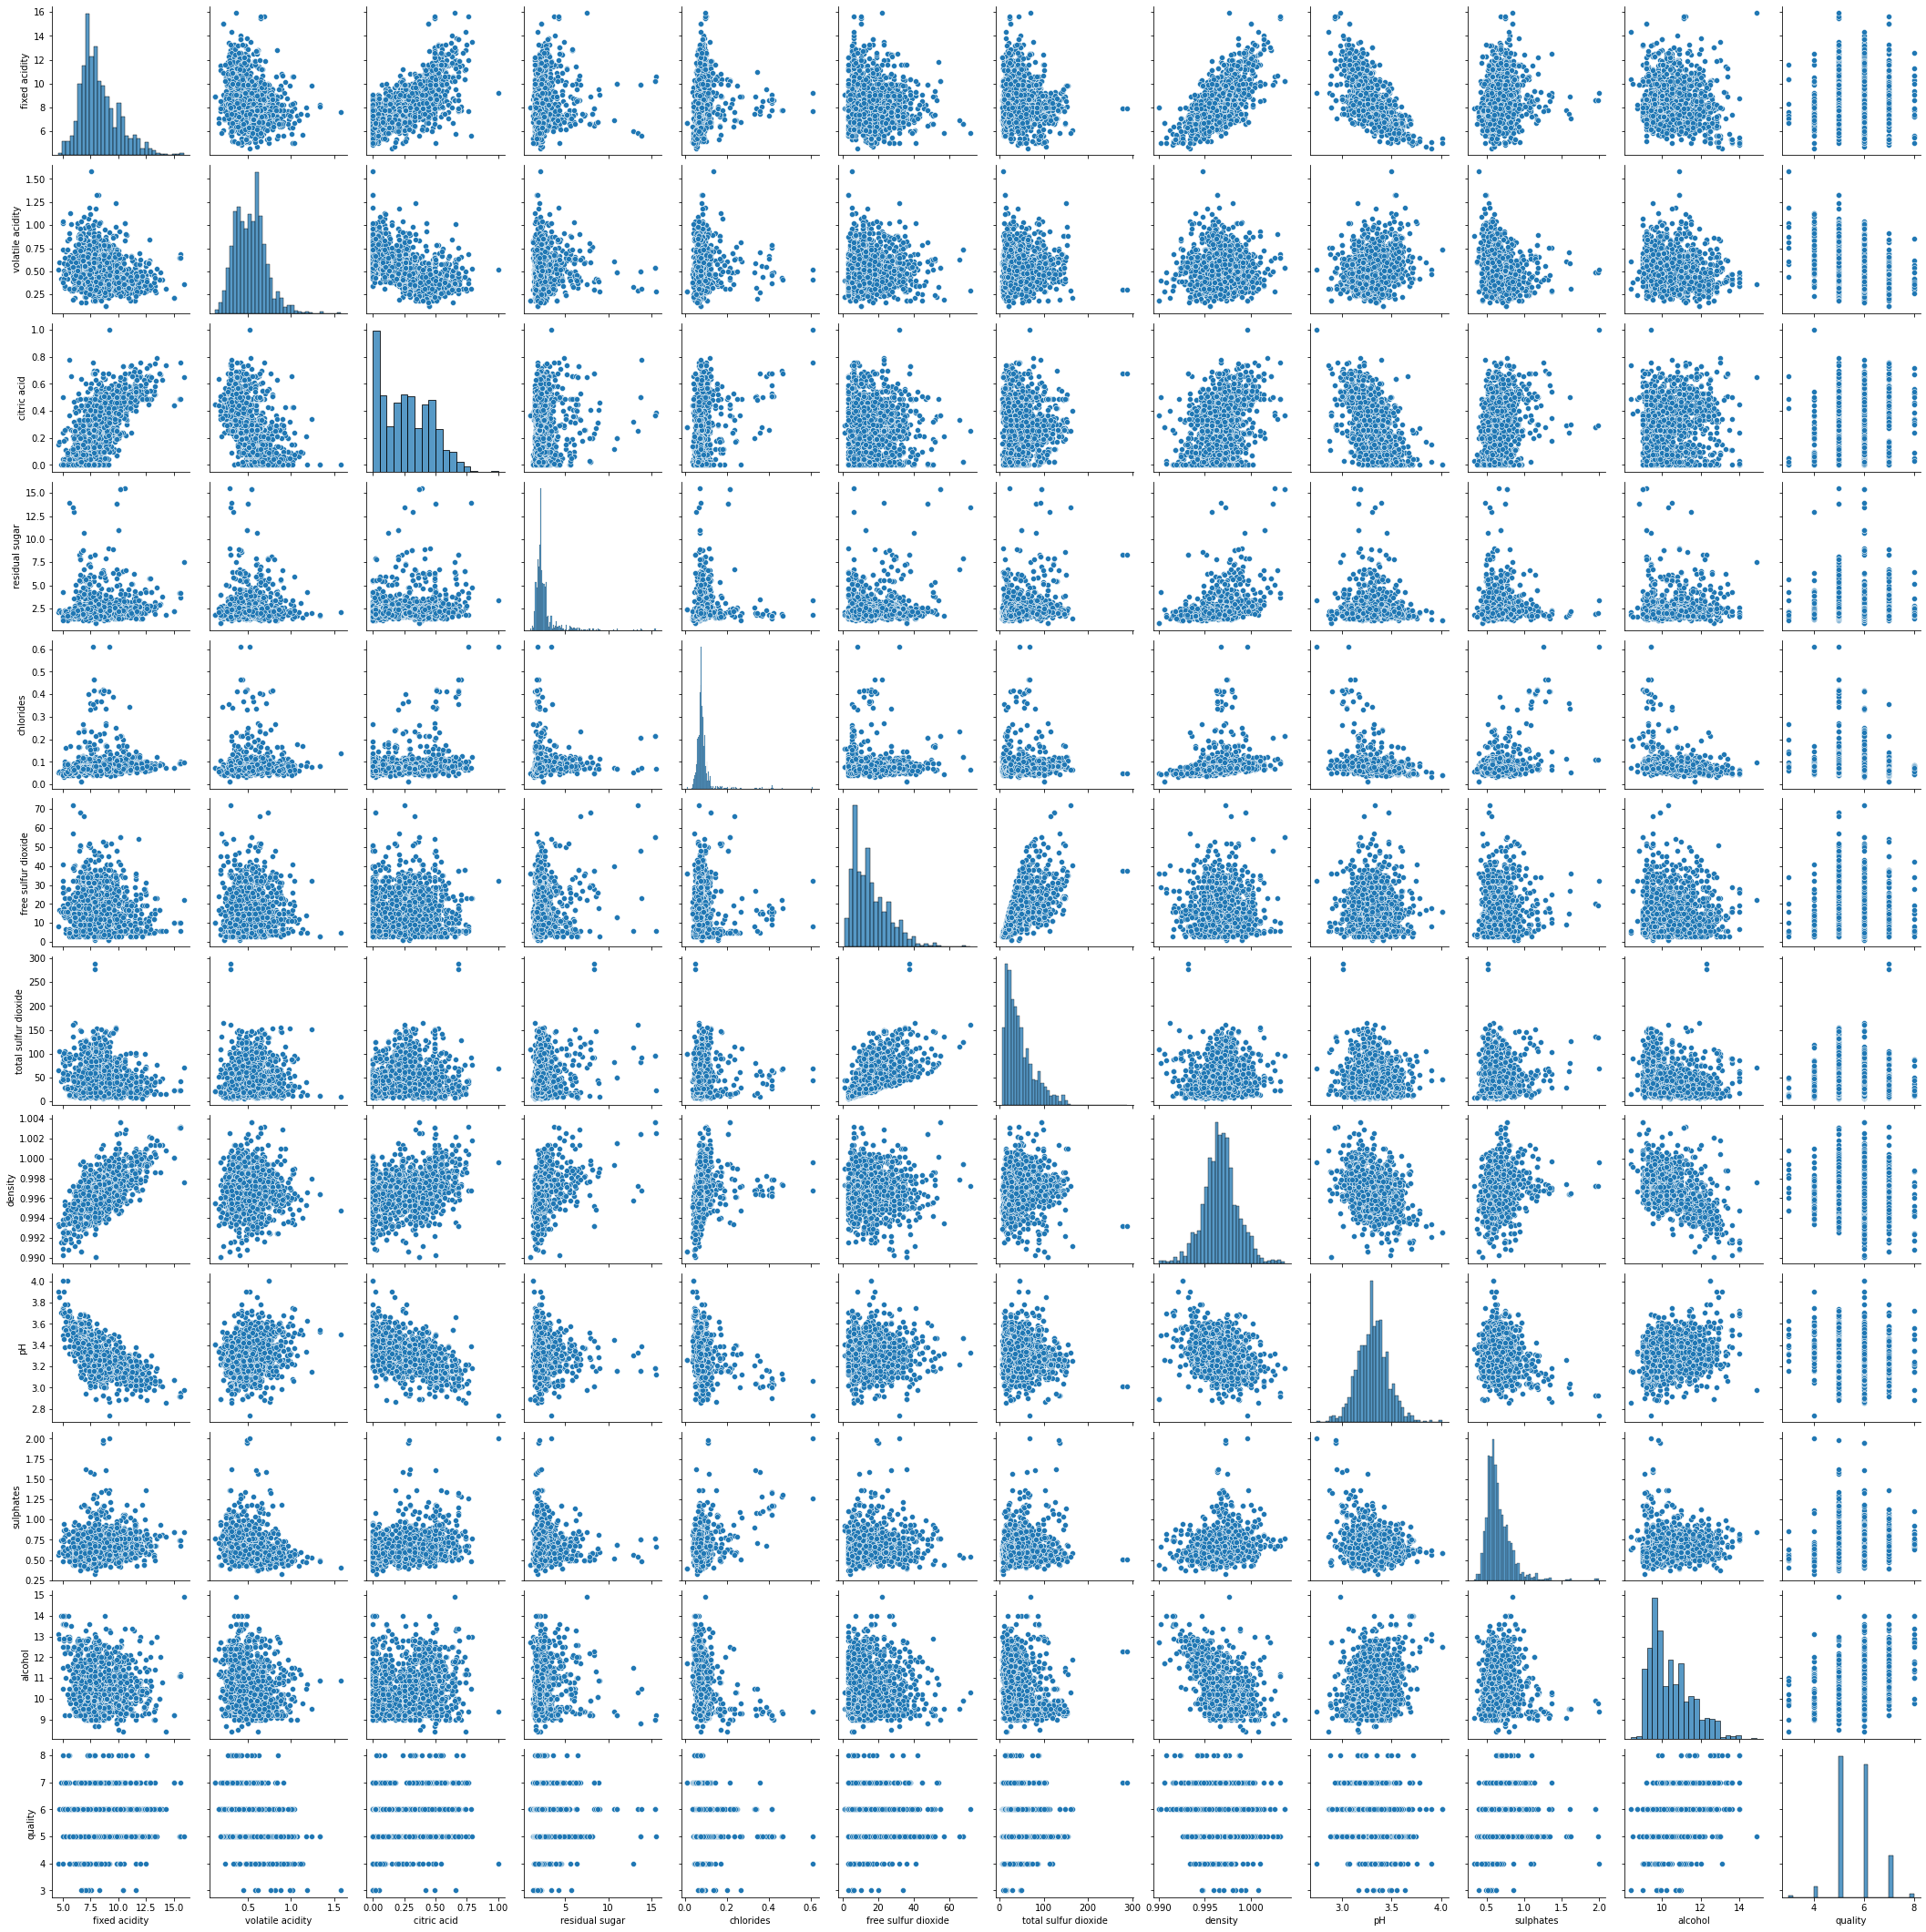

In [53]:
sns.pairplot(bd)

Correlation Matrix

<AxesSubplot:>

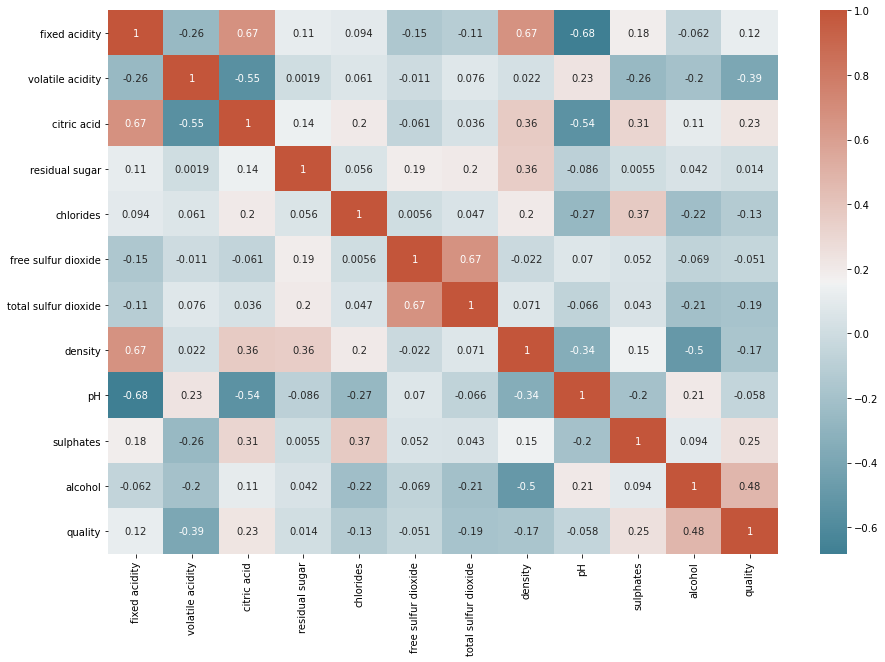

In [54]:
corr = bd.corr()
plt.pyplot.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

#### Pre-Process Outliers:

In [55]:
bd.quality.median()

6.0

In [56]:
bd.quality.mean()

5.6360225140712945

In [57]:
Q1 = bd.quality.quantile(0.25)
print(Q1)
Q3 = bd.quality.quantile(0.75)
print(Q3)
IQR = Q3- Q1
print(IQR)
print(Q1-(1*IQR))
print(Q3 + (2*IQR))


5.0
6.0
1.0
4.0
8.0


In [58]:
bd[(bd.quality<(Q1- 1 * IQR))|(bd.quality > (Q3 + 2 * IQR))]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3
517,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.70,3
832,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.90,3
899,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.00,3
1299,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.90,3
1374,6.8,0.815,0.00,1.20,0.267,16.0,29.0,0.99471,3.32,0.51,9.80,3
1469,7.3,0.980,0.05,2.10,0.061,20.0,49.0,0.99705,3.31,0.55,9.70,3
1478,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.20,3
1505,6.7,0.760,0.02,1.80,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3


random imputations

In [59]:
median = bd.loc[bd['quality']<10,'quality'].median()
median

6.0

### Create Classification version of target variable

For this problem, I defined a bottle of wine as ‘good quality’ if it had a quality score of 6 or higher, and if it had a score of less than 6, it was deemed ‘bad quality’.
Once I converted the output variable to a binary output, I separated my feature variables (X) and the target variable (y) into separate dataframes.

In [60]:
bd['goodquality'] = [1 if x >= 6 else 0 for x in bd['quality']]
X = bd.drop(['quality','goodquality'], axis = 1)
y = bd['goodquality']


See proportion of good vs bad wines

In [61]:
bd['goodquality'].value_counts()

1    855
0    744
Name: goodquality, dtype: int64

# Preparing Data for Modelling

### Standardizing Feature Variables

The first thing that I did was standardize the data. Standardizing the data means that it will transform the data so that its distribution will have a mean of 0 and a standard deviation of 1. It’s important to standardize your data in order to equalize the range of the data.

 Normalize feature variables

In [62]:
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

Split data

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

# Modelling

For this project, I wanted to compare four different machine learning models: decision trees, random forests, AdaBoost, Gradient Boost. 

### -> Decision tree

In [64]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73       185
           1       0.76      0.80      0.78       215

    accuracy                           0.76       400
   macro avg       0.76      0.75      0.75       400
weighted avg       0.76      0.76      0.76       400



### -> Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       185
           1       0.79      0.83      0.81       215

    accuracy                           0.79       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.79      0.79      0.79       400



### -> Gradient Boosting

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier(random_state=1)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74       185
           1       0.78      0.77      0.77       215

    accuracy                           0.76       400
   macro avg       0.76      0.76      0.76       400
weighted avg       0.76      0.76      0.76       400



### -> AdaBoost

In [69]:
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier(random_state=1)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))


              precision    recall  f1-score   support

           0       0.69      0.70      0.70       185
           1       0.74      0.73      0.74       215

    accuracy                           0.72       400
   macro avg       0.72      0.72      0.72       400
weighted avg       0.72      0.72      0.72       400



## Feature Importance

via Random Forest

<AxesSubplot:>

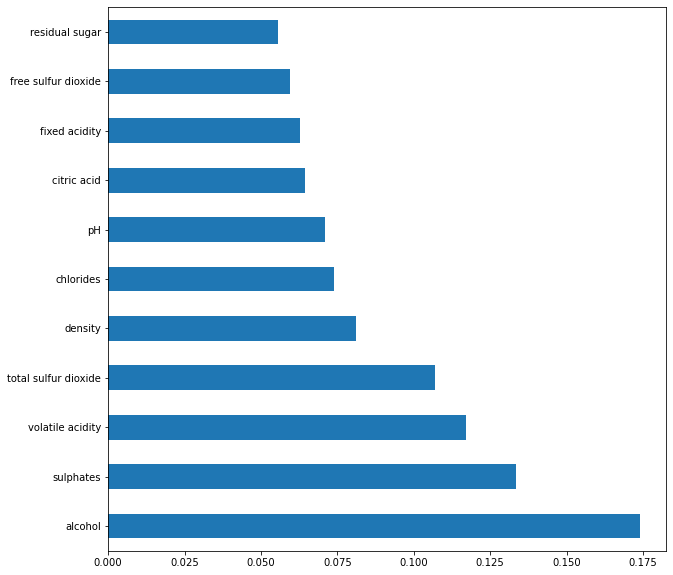

In [71]:
feat_importances = pd.Series(model2.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

## Comparing the Top 4 Features

 Filtering bd for only good quality

In [72]:
bd_temp = bd[bd['goodquality']==1]
bd_temp.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.0
mean,8.474035,0.474146,0.299883,2.535965,0.082661,15.272515,39.352047,0.996467,3.310643,0.692620,10.855029,6.274854,1.0
std,1.862795,0.161999,0.199889,1.424835,0.037258,10.038538,27.253280,0.002067,0.154554,0.155558,1.106109,0.491627,0.0
min,4.700000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.390000,8.400000,6.000000,1.0
25%,7.100000,0.350000,0.115000,1.900000,0.067000,7.000000,20.000000,0.995185,3.210000,0.590000,10.000000,6.000000,1.0
50%,8.000000,0.460000,0.310000,2.200000,0.077000,13.000000,33.000000,0.996400,3.310000,0.660000,10.800000,6.000000,1.0
75%,9.650000,0.580000,0.460000,2.600000,0.087500,20.500000,50.000000,0.997685,3.400000,0.770000,11.700000,7.000000,1.0
max,15.600000,1.040000,0.780000,15.400000,0.415000,72.000000,289.000000,1.003690,4.010000,1.950000,14.000000,8.000000,1.0


                                            Good Quality

Filtering bd for only bad quality


In [74]:
bd_temp2 = bd[bd['goodquality']==0]
bd_temp2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,744.000000,744.000000,744.000000,744.00000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.0
mean,8.142204,0.589503,0.237755,2.54207,0.092989,16.567204,54.645161,0.997068,3.311653,0.618535,9.926478,4.901882,0.0
std,1.572396,0.177956,0.183368,1.39355,0.055781,10.890291,36.720468,0.001598,0.154296,0.176194,0.758007,0.339894,0.0
min,4.600000,0.180000,0.000000,1.20000,0.039000,3.000000,6.000000,0.992560,2.740000,0.330000,8.400000,3.000000,0.0
25%,7.100000,0.460000,0.080000,1.90000,0.074000,8.000000,23.750000,0.996120,3.200000,0.520000,9.400000,5.000000,0.0
50%,7.800000,0.590000,0.220000,2.20000,0.081000,14.000000,45.000000,0.996935,3.310000,0.580000,9.700000,5.000000,0.0
75%,8.900000,0.680000,0.360000,2.60000,0.094000,23.000000,78.000000,0.997900,3.400000,0.650000,10.300000,5.000000,0.0
max,15.900000,1.580000,1.000000,15.50000,0.611000,68.000000,155.000000,1.003150,3.900000,2.000000,14.900000,5.000000,0.0


                                              Bad Quality

By looking into the details, we can see that good quality wines have higher levels of alcohol on average, have a lower volatile acidity on average, higher levels of sulphates on average, and higher levels of residual sugar on average.

### Done BY - Aagam Shah





### Mail- aagam.shah192001@gmail.com